Hierarchical clustering : 

— step 1 : for each point initially we will consider as a separate cluster  

— step 2 : find the nearest point and create new cluster 

— step 3 : keep on doing the process [step 2] until we get a single cluster

— Types : 

Agglomerative clustering —> bottom up approach 

Divisive clustering —> top down approach 

—> Linkage Typers

### Step 1 : import libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
df=pd.read_csv("Mall_Customers.csv")

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2 : Data Preprocessing

In [21]:
df.columns=['CustomerID','Gender','Age','Annual Income','Spending Score']

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.drop(columns={'CustomerID','Gender'},inplace=True)

In [24]:
df.head()
df.isna().sum()

Age               0
Annual Income     0
Spending Score    0
dtype: int64

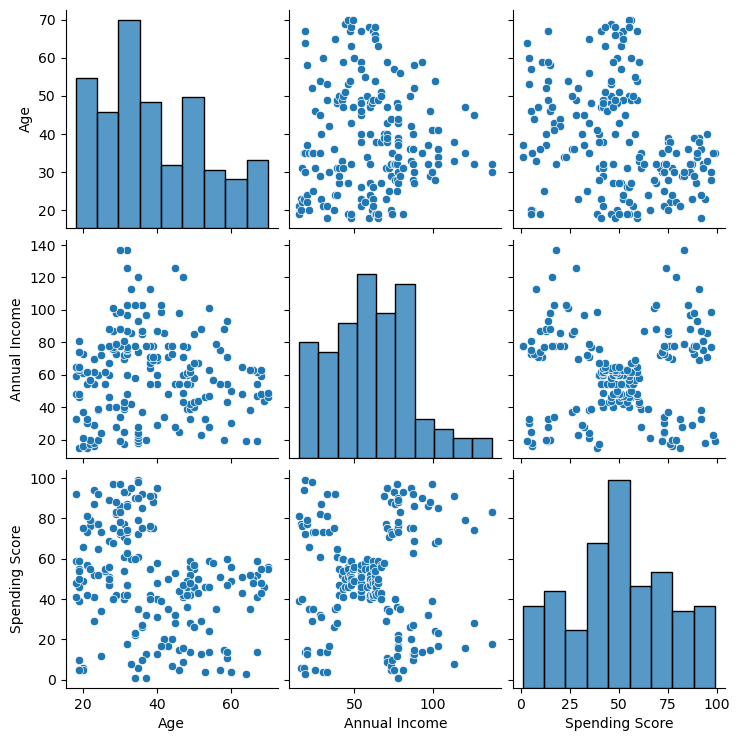

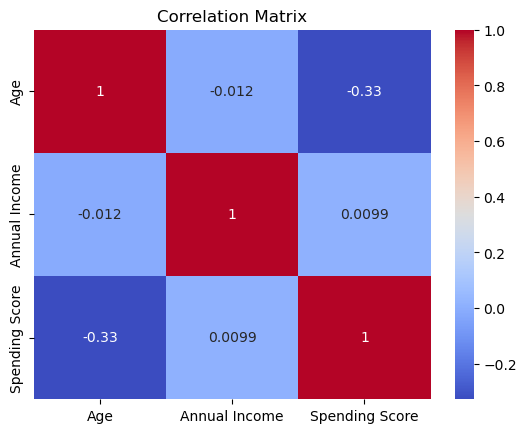

In [25]:
sns.pairplot(df)
plt.show()
# display the correlation matrix
cm = df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### STEP 5 : Feature Engineering

In [26]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df)


### STEP 6 : Train Heirarchial model
# train Agglomerative clustering model

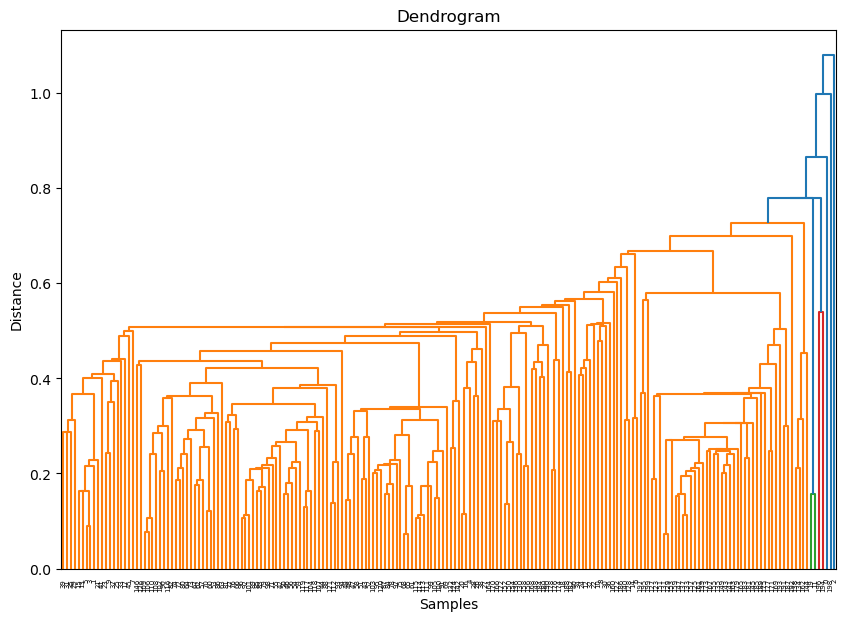

In [27]:

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# create the dendrogram
linked = linkage(data,method='single')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending',
show_leaf_counts=True)
plt.title('Dendrogram' )
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

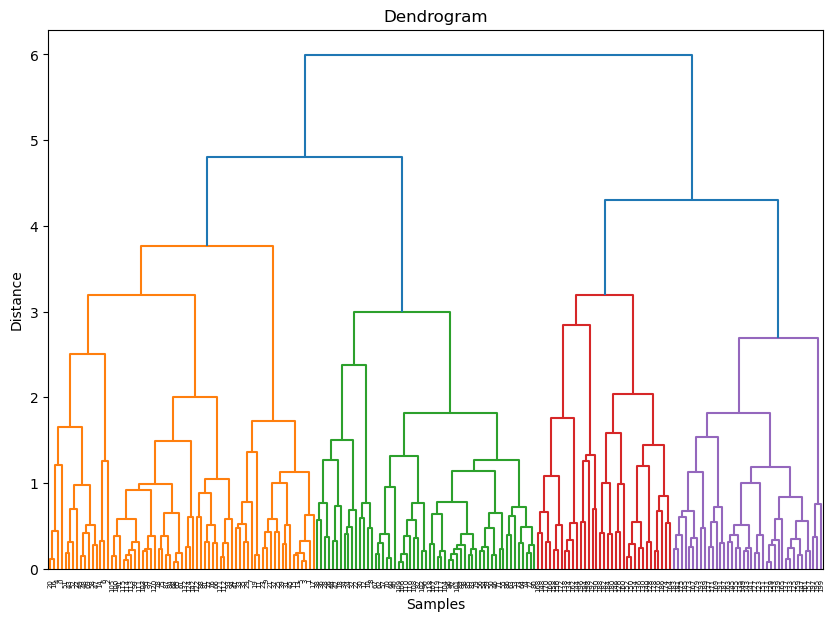

In [28]:
# complete linkage
linked = linkage(data,method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending',
show_leaf_counts=True)
plt.title('Dendrogram' )
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

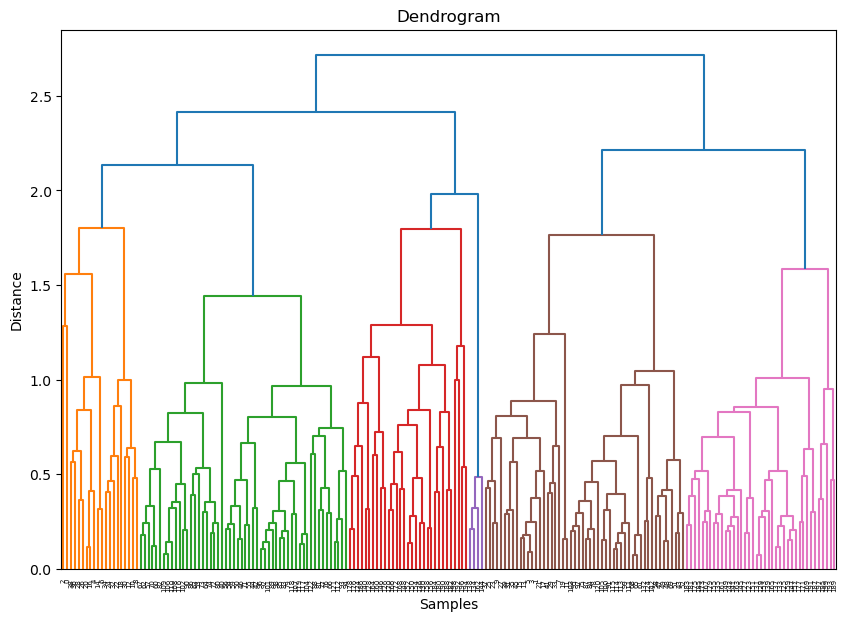

In [29]:
# average linkage
linked = linkage(data,method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending',
show_leaf_counts=True)
plt.title('Dendrogram' )
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

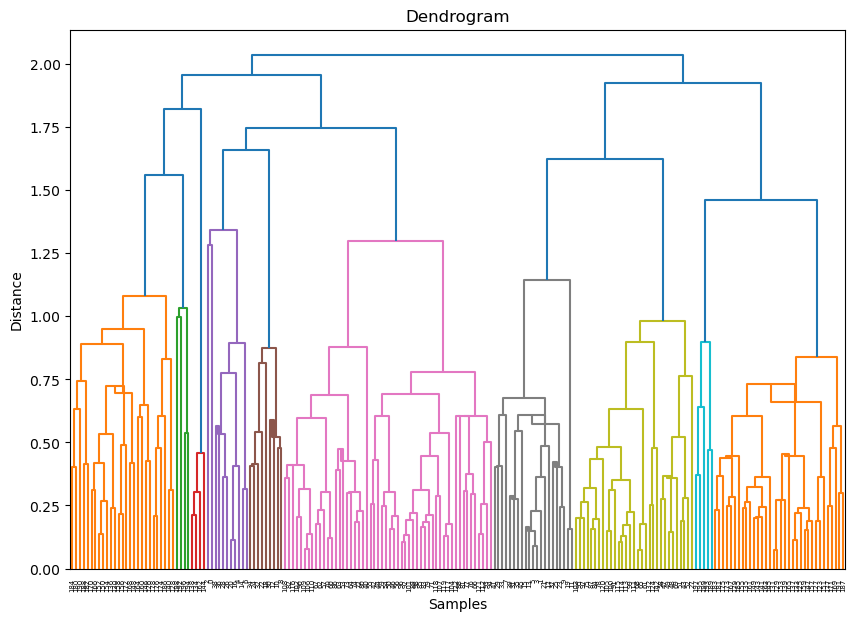

In [30]:
# centroid linkage
linked = linkage(data,method='centroid')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending',
show_leaf_counts=True)
plt.title('Dendrogram' )
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_16696\497507415.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], cmap='rainbow')


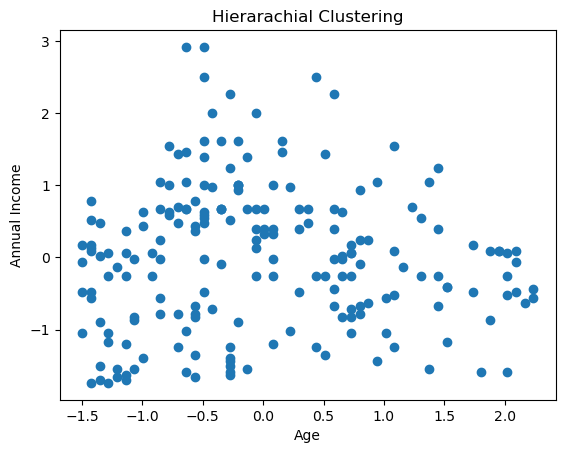

In [33]:
# visualization 
plt.scatter(data[:, 0], data[:, 1], cmap='rainbow')
plt.title("Hierarachial Clustering")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()



In [34]:
data = pd.DataFrame(data, columns=['Age', 'Annual-Income', 'Spending-Score'])
data.head()

,Age,Annual-Income,Spending-Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [35]:
# train model
model = AgglomerativeClustering(n_clusters=5)
model.fit(data)
data['labels'] = model.labels_
data

,Age,Annual-Income,Spending-Score,labels
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...
195,-0.276302,2.268791,1.118061,2
196,0.441365,2.497807,-0.861839,3
197,-0.491602,2.497807,0.923953,2
198,-0.491602,2.917671,-1.250054,3


In [36]:
# saved model 
import joblib
joblib.dump(model, 'hierarchicial_model.pkl')
# saved dataset
data.to_csv('Mall_Customers_Clustered.csv', index=False)
## try Supervised Model
x = data.drop(columns=['labels'])
y = data['labels']

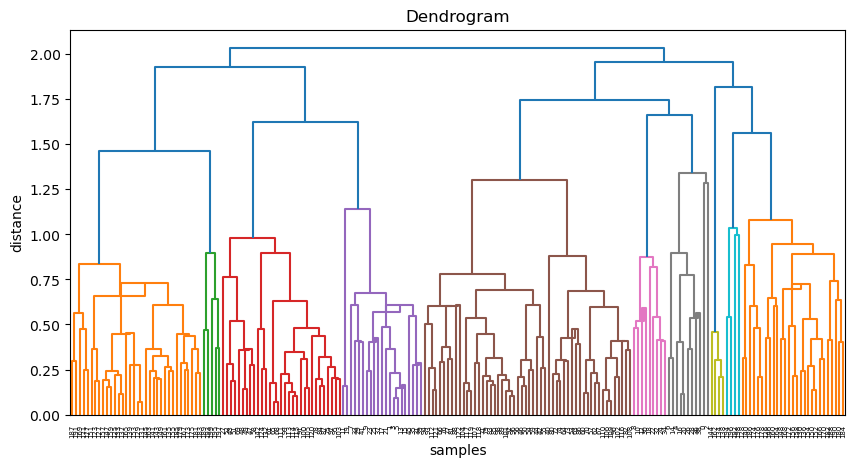

In [37]:
## splitting parts
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
### Plot Dendrogram with Threshold
plt.figure(figsize=(10,5))
dendrogram(linked)
plt.axhline(y=150, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('distance')
plt.show()

In [40]:
# find the number of clusters using threshold
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linked, t=150, criterion='distance') # type: ignore
n_clusters = len(set(clusters))
print(f'Number of clusters: {n_clusters}')
# AGGLOMERATIVE CLUSTERING using Threshold
# Optimal threshold found from dendrogram (distance ~8 gives ~4-5 clusters)
threshold = 8
agglomerative_model = AgglomerativeClustering(n_clusters=None,distance_threshold=threshold, linkage='ward')
agglomerative_clusters = agglomerative_model.fit_predict(data)


Number of clusters: 1


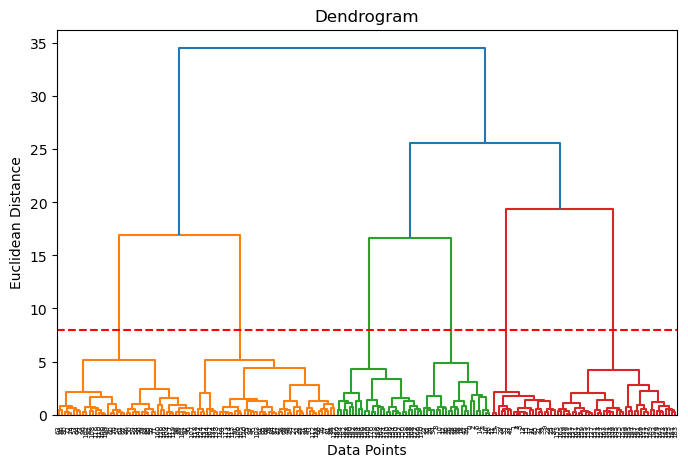

In [41]:
data['clusters'] = agglomerative_clusters
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(8,5))

dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))

plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")

plt.axhline(y=8, color='r', linestyle='--')  # threshold line
plt.show()

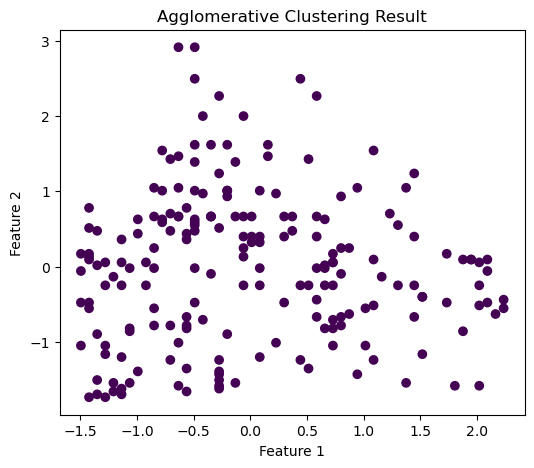

In [42]:
plt.figure(figsize=(6,5))

plt.scatter(data.iloc[:,0], data.iloc[:,1], c=clusters)

plt.title("Agglomerative Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()